# Recruting Activity ' 2018

Please use this toggle to display or hide code

In [91]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

inserting necessary packages

In [79]:
import pandas as pd
import os
from PIL import Image
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import altair as alt
import streamlit as st
from IPython.display import Image

In [5]:
def load_data():
    df = pd.read_csv("c://Users//subhr//final_data.csv")
    return df

df = load_data()

In [6]:
df.head(10)

,ID,Pos,Department,Stage,Stage_class,Application_date,App_source,Qualification,Experience,Type,Offer_taken,Conf_Date,Recency,Event
0,269132,Sr. Customer Service Operations Associate,Operations,New Application,0,28-02-2018,Outsourced,Bachelors,12,Experienced,Not avaliable,NaN,--,9
1,1929872,Finance Manager,Finance,New Application,0,30-06-2016,Agency,Masters,4,Experienced,Not avaliable,NaN,--,9
2,3855386,Associate Software Developer,Engineering,In-House Interview,2,30-09-2016,Campus Event,PhD,2,Campus,Not avaliable,NaN,--,9
3,2468,Associate Software Developer,Engineering,Offer Sent,1,01-11-2018,Campus Job Board,PhD,2,Campus,Offer Response Pending,15-12-2018,44,2
4,2471,Associate Relationship Manager,Sales,Offer Sent,1,13-12-2018,Campus Event,Masters,0,Campus,Offer Response Pending,31-01-2019,49,2
5,2475,Associate Software Developer,Engineering,Offer Sent,1,21-12-2018,Advertisement,Masters,0,Campus,Offer Response Pending,05-02-2019,46,2
6,2480,Associate Relationship Manager,Sales,Offer Sent,1,25-12-2018,Campus Event,Masters,0,Campus,Offer Response Pending,09-02-2019,46,2
7,2486,Associate Relationship Manager,Sales,Offer Sent,1,06-12-2018,Campus Event,Masters,1,Campus,Offer Response Pending,17-01-2019,42,2
8,2493,Associate Software Developer,Engineering,Offer Sent,1,11-12-2018,Campus Event,PhD,1,Campus,Offer Response Pending,26-01-2019,46,2
9,2501,Associate Software Developer,Engineering,Offer Sent,1,13-12-2018,Campus Job Board,Bachelors,0,Campus,Offer Response Pending,26-01-2019,44,2


In [7]:
#extracting day and year from the date
df['Day'] = pd.DatetimeIndex(df['Conf_Date']).day_name()
df['Conf_Year'] = pd.DatetimeIndex(df['Conf_Date']).year
df['Application_Year'] = pd.DatetimeIndex(df['Application_date']).year


In [8]:
df.head(5)

,ID,Pos,Department,Stage,Stage_class,Application_date,App_source,Qualification,Experience,Type,Offer_taken,Conf_Date,Recency,Event,Day,Conf_Year,Application_Year
0,269132,Sr. Customer Service Operations Associate,Operations,New Application,0,28-02-2018,Outsourced,Bachelors,12,Experienced,Not avaliable,NaN,--,9,NaN,NaN,2018
1,1929872,Finance Manager,Finance,New Application,0,30-06-2016,Agency,Masters,4,Experienced,Not avaliable,NaN,--,9,NaN,NaN,2016
2,3855386,Associate Software Developer,Engineering,In-House Interview,2,30-09-2016,Campus Event,PhD,2,Campus,Not avaliable,NaN,--,9,NaN,NaN,2016
3,2468,Associate Software Developer,Engineering,Offer Sent,1,01-11-2018,Campus Job Board,PhD,2,Campus,Offer Response Pending,15-12-2018,44,2,Saturday,2018.0,2018
4,2471,Associate Relationship Manager,Sales,Offer Sent,1,13-12-2018,Campus Event,Masters,0,Campus,Offer Response Pending,31-01-2019,49,2,Thursday,2019.0,2018


There are 4959 columns and 11 columns , For 3 candidates dates were wrongly mentioned , it was corrected before the analysis. For Experienced candidates the **number of candidates who had in-house interviews** is **>** **no. of candidates for initial phone screening** which is not possible in real life hence adjustments have been made accordingly , I have also added few dummy variables like **Event** , **Stage Class** to make things simpler


For the analysis I have considered **12** KPI's , they are:

**1.** Acceptance rate in 2018 by **Department**

**2.** How are the campus candidates progressing through the recruiiting process , any notable differences across certain type of candidates

**3.** Recruitment rate by **Position**


**4.** Qualified candidates per hire by **Department**


**5.** Time to hire by **Department**


**6.** Offer acceptance rate


**7.** Yield ratio


**8.** Sourcing channel effectiveness


**9.** Candidate diversity


**10.** Mean experience by **Department**


**11.** Offer letter acceptance rate by day of the week


**12.** Changes and potential areas to focus to develope a cloud architechture across the organization

# Acceptance rate in 2018 by Department

In [9]:
#filtering 2018 data
acc = df.loc[df['Application_Year'].isin([2018])] 
acc = acc.reset_index(drop=False)

In [10]:
#aggregating by Department
#af2_1=acc.loc[acc['Event'].isin([0 , 1 , 2])]
a3 = acc.groupby(['Department'])['ID'].count()

#Seperating those candidates who have accepted and aggregating by different Pos
af2=acc[(acc.Event == 1) & (acc.Conf_Year == 2018)]
a4 = af2.groupby('Department')['ID'].count()


In [11]:
#applications per hire
applications_per_hire_dep_18 = pd.merge(a3,a4,how = 'outer', on = 'Department')
applications_per_hire_dep_18.rename(columns = {'ID_x':'Count', 'ID_y':'Hired'}, inplace = True)
applications_per_hire_dep_18['Ratio'] = round((applications_per_hire_dep_18['Hired']/applications_per_hire_dep_18['Count'])*100,2)
applications_per_hire_dep_18 = applications_per_hire_dep_18.reset_index(drop=False)
applications_per_hire_dep_18 = applications_per_hire_dep_18.sort_values(["Ratio"], ascending = (False))


Text(0.5, 0.98, 'Hiring by Department in 2018')

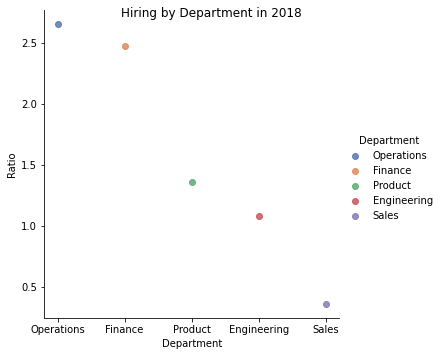

In [12]:
sns.lmplot( x="Department", y="Ratio", data=applications_per_hire_dep_18, fit_reg=False, hue='Department', legend=True, palette="deep").fig.suptitle("Hiring by Department in 2018")

In [14]:
applications_per_hire_dep_18.style.highlight_max(axis=0).format({'Ratio':'{:.1f}','Hired':'{:.0f}'})

,Department,Count,Hired,Ratio
2,Operations,113,3,2.6
1,Finance,81,2,2.5
3,Product,294,4,1.4
0,Engineering,830,9,1.1
4,Sales,842,3,0.4


# Campus candidate progress & Observation

Campus hiring progress & Observation

In [17]:
#filtering only the campus candidates
campus = df.loc[df['Type'] == 'Campus'] 
#there are a total of 4131 candidates from all category of offer
#count of candidates applied by year

In [18]:
#Now we will dig a little deeper and see how campus candidates are performing through the years
campus_16 = campus.loc[df['Application_Year'] == 2016] 
campus_17 = campus.loc[df['Application_Year'] == 2017] 
campus_18 = campus.loc[df['Application_Year'] == 2018]

In [19]:
#overall campus hire trend
#Pass through rate
c8 = campus.groupby('Stage')['ID'].nunique()
c8 = c8.reset_index(drop=False)
c8.set_index('Stage',inplace = True)
#adding 93 candidates who have already crossed this phases
c8.loc['New Application','ID'] = c8.loc['New Application','ID']+93
c8.loc['Phone Screen','ID'] = c8.loc['Phone Screen','ID']+93
c8.loc['In-House Interview','ID'] = c8.loc['In-House Interview','ID']+93
c8 = c8.sort_values(["ID"], ascending = (False))
c8 = c8.reset_index(drop=False)
c_row = pd.Series(['Accepted', 49])
c_row_df = pd.DataFrame([c_row])
c_row_df.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
c8 = pd.concat([c8, c_row_df], ignore_index=True)
c8.set_index('Stage',inplace = True)
c8['Percentage'] =(c8[['ID']].pct_change()[:6])
c8['Percentage'] = abs(c8['Percentage'])
c8['Percentage'] =np.round((1-c8.loc[:,'Percentage'].values)*100)
c8 = c8.reset_index(drop=False)

In [21]:
c8.style.format({'Percentage':'{:.2f}'}).highlight_max(axis=0)

,Stage,ID,Percentage
0,New Application,2942,nan
1,Phone Screen,737,25.00
2,In-House Interview,638,87.00
3,Offer Sent,93,15.00
4,Accepted,49,53.00


The pass through rate shows the total number of new applicants were **2942** , from that only **25%** went to the next stage ~ (Phone screen).After phone screen **87%** gets a call for the inhouse interview and from that group of **638** candidates only **15%** got an offer letter which is **93** Candidates and out of **93** candidates **49** candidates have accepted it , i.e **53%**.


In [24]:
#pass through rate in 2016
c16 = campus_16.groupby('Stage')['ID'].nunique()
c16 = c16.reset_index(drop=False)
c16.set_index('Stage',inplace = True)
#adding 93 candidates who have already crossed this phases
c16.loc['New Application','ID'] = c16.loc['New Application','ID']+28
c16.loc['Phone Screen','ID'] = c16.loc['Phone Screen','ID']+28
c16.loc['In-House Interview','ID'] = c16.loc['In-House Interview','ID']+28
c16 = c16.sort_values(["ID"], ascending = (False))
c16 = c16.reset_index(drop=False)
c_row_16 = pd.Series(['Accepted', 15])
c_row_df_16 = pd.DataFrame([c_row_16])
c_row_df_16.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
c16 = pd.concat([c16, c_row_df_16], ignore_index=True)
c16.set_index('Stage',inplace = True)
c16['Percentage'] =(c16[['ID']].pct_change()[:6])
c16['Percentage'] = abs(c16['Percentage'])
c16['Percentage'] =np.round((1-c16.loc[:,'Percentage'].values)*100)
c16 = c16.reset_index(drop=False)
c16['Year'] = 2016



#pass through rate in 2017
c17 = campus_17.groupby('Stage')['ID'].nunique()
c17 = c17.reset_index(drop=False)
c17.set_index('Stage',inplace = True)
#adding 93 candidates who have already crossed this phases
c17.loc['New Application','ID'] = c17.loc['New Application','ID']+23
c17.loc['Phone Screen','ID'] = c17.loc['Phone Screen','ID']+23
c17.loc['In-House Interview','ID'] = c17.loc['In-House Interview','ID']+23
c17 = c17.sort_values(["ID"], ascending = (False))
c17 = c17.reset_index(drop=False)
c_row_17 = pd.Series(['Accepted', 17])
c_row_df_17 = pd.DataFrame([c_row_17])
c_row_df_17.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
c17 = pd.concat([c17, c_row_df_17], ignore_index=True)
c17.set_index('Stage',inplace = True)
c17['Percentage'] =(c17[['ID']].pct_change()[:6])
c17['Percentage'] = abs(c17['Percentage'])
c17['Percentage'] =np.round((1-c17.loc[:,'Percentage'].values)*100)
c17 = c17.reset_index(drop=False)
c17['Year'] = 2017


#pass through rate in 2017
c18 = campus_18.groupby('Stage')['ID'].nunique()
c18 = c18.reset_index(drop=False)
c18.set_index('Stage',inplace = True)
#adding 93 candidates who have already crossed this phases
c18.loc['New Application','ID'] = c18.loc['New Application','ID']+41
c18.loc['Phone Screen','ID'] = c18.loc['Phone Screen','ID']+41
c18.loc['In-House Interview','ID'] = c18.loc['In-House Interview','ID']+41
c18 = c18.sort_values(["ID"], ascending = (False))
c18 = c18.reset_index(drop=False)
c_row_18 = pd.Series(['Accepted', 18])
c_row_df_18 = pd.DataFrame([c_row_18])
c_row_df_18.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
c18 = pd.concat([c18, c_row_df_18], ignore_index=True)
c18.set_index('Stage',inplace = True)
c18['Percentage'] =(c18[['ID']].pct_change()[:6])
c18['Percentage'] = abs(c18['Percentage'])
c18['Percentage'] =np.round((1-c18.loc[:,'Percentage'].values)*100)
c18 = c18.reset_index(drop=False)
c18['Year'] = 2018

In [25]:
f2 = pd.concat([c16, c17, c18], ignore_index=True)
f2['Type'] = 'Student'
f2 = f2.reset_index(drop=False)

In [50]:
f2.style.format({'Percentage':'{:.1f}'}).bar(subset=['Percentage', 'Year'], color='lightyellow')

,index,Stage,ID,Percentage,Year,Type
0,0,New Application,766,nan,2016,Student
1,1,Phone Screen,255,33.0,2016,Student
2,2,In-House Interview,185,73.0,2016,Student
3,3,Offer Sent,28,15.0,2016,Student
4,4,Accepted,15,54.0,2016,Student
5,5,New Application,845,nan,2017,Student
6,6,Phone Screen,186,22.0,2017,Student
7,7,In-House Interview,164,88.0,2017,Student
8,8,Offer Sent,23,14.0,2017,Student
9,9,Accepted,17,74.0,2017,Student


Although the number of new candidates are much higher in 2018 the acceptance rate for campus students is the highest in 2017 , **74%** then in 2016 **54%** and then 2018 **44%**. The overall passthrough rate from different stages has remained same over these years but the acceptance rate has gone down and it demands a second look.'


Experienced candidates recruitment progress & Observation

In [28]:
#==================================================================================================================================
#filtering only experienced candidates
#==================================================================================================================================

exp = df.loc[df['Type'] == 'Experienced'] 
#there are a total of 4131 candidates from all category of offer
#count of candidates applied by year
e1 = exp.groupby('Application_Year')['ID'].nunique()

In [29]:
#Now we will dig a little deeper and see how campus candidates are performing through the years
exp_16 = exp.loc[df['Application_Year'] == 2016] 
exp_17 = exp.loc[df['Application_Year'] == 2017] 
exp_18 = exp.loc[df['Application_Year'] == 2018] 


In [30]:
#overall Lateral hire trend
#Pass through rate
e8 = exp.groupby('Stage')['ID'].nunique()
e8 = e8.reset_index(drop=False)
e8.set_index('Stage',inplace = True)
#adding 31 candidates who have already crossed this phases
e8.loc['New Application','ID'] = e8.loc['New Application','ID']+31
e8.loc['Phone Screen','ID'] = e8.loc['Phone Screen','ID']+31
e8.loc['In-House Interview','ID'] = e8.loc['In-House Interview','ID']+31
e8 = e8.sort_values(["ID"], ascending = (False))
e8 = e8.reset_index(drop=False)
e_row = pd.Series(['Accepted', 19])
e_row_df = pd.DataFrame([e_row])
e_row_df.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
e8 = pd.concat([e8, e_row_df], ignore_index=True)
e8.set_index('Stage',inplace = True)
e8['Percentage'] =(e8[['ID']].pct_change()[:6])
e8['Percentage'] = abs(e8['Percentage'])
e8['Percentage'] =np.round((1-e8.loc[:,'Percentage'].values)*100,2)
e8 = e8.reset_index(drop=False)


In [31]:
e8.style.highlight_max(axis=0).format({'Percentage':'{:.1f}'})

,Stage,ID,Percentage
0,New Application,546,nan
1,In-House Interview,177,32.4
2,Phone Screen,167,94.3
3,Offer Sent,31,18.6
4,Accepted,19,61.3


The pass through rate shows the total number of new applicants were **546** , from that **35%** went to the next stage ~ (Phone screen).After phone screen **77%** were selcted for the inhouse interview and from that group of **150** candidates **20%** got an offer letter which is **31** Candidates and out of **31** candidates **19** candidates have accepted it , i.e **61%**.

In [32]:
#pass through rate in 2016
e16 = exp_16.groupby('Stage')['ID'].nunique()
e16 = e16.reset_index(drop=False)
e16.set_index('Stage',inplace = True)
#adding 7 candidates who have already crossed this phases
e16.loc['New Application','ID'] = e16.loc['New Application','ID']+7
e16.loc['Phone Screen','ID'] = e16.loc['Phone Screen','ID']+7
e16.loc['In-House Interview','ID'] = e16.loc['In-House Interview','ID']+7
e16 = e16.sort_values(["ID"], ascending = (False))
e16 = e16.reset_index(drop=False)
e_row_16 = pd.Series(['Accepted', 4])
e_row_df_16 = pd.DataFrame([e_row_16])
e_row_df_16.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
e16 = pd.concat([e16, e_row_df_16], ignore_index=True)
e16.set_index('Stage',inplace = True)
e16['Percentage'] =(e16[['ID']].pct_change()[:6])
e16['Percentage'] = abs(e16['Percentage'])
e16['Percentage'] =np.round((1-e16.loc[:,'Percentage'].values)*100)
e16 = e16.reset_index(drop=False)
e16['Year'] = 2016


#pass through rate in 2017
e17 = exp_17.groupby('Stage')['ID'].nunique()
e17 = e17.reset_index(drop=False)
e17.set_index('Stage',inplace = True)
#adding 11 candidates who have already crossed this phases
e17.loc['New Application','ID'] = e17.loc['New Application','ID']+11
e17.loc['Phone Screen','ID'] = e17.loc['Phone Screen','ID']+11
e17.loc['In-House Interview','ID'] = e17.loc['In-House Interview','ID']+11
e17 = e17.sort_values(["ID"], ascending = (False))
e17 = e17.reset_index(drop=False)
e_row_17 = pd.Series(['Accepted', 9])
e_row_df_17 = pd.DataFrame([e_row_17])
e_row_df_17.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
e17 = pd.concat([e17, e_row_df_17], ignore_index=True)
e17.set_index('Stage',inplace = True)
e17['Percentage'] =(e17[['ID']].pct_change()[:6])
e17['Percentage'] = abs(e17['Percentage'])
e17['Percentage'] =np.round((1-e17.loc[:,'Percentage'].values)*100)
e17 = e17.reset_index(drop=False)
e17['Year'] = 2017


#pass through rate in 2018
e18 = exp_18.groupby('Stage')['ID'].nunique()
e18 = e18.reset_index(drop=False)
e18.set_index('Stage',inplace = True)
#adding 13 candidates who have already crossed this phases
e18.loc['New Application','ID'] = e18.loc['New Application','ID']+13
e18.loc['Phone Screen','ID'] = e18.loc['Phone Screen','ID']+13
e18.loc['In-House Interview','ID'] = e18.loc['In-House Interview','ID']+13
e18 = e18.sort_values(["ID"], ascending = (False))
e18 = e18.reset_index(drop=False)
e_row_18 = pd.Series(['Accepted', 5])
e_row_df_18 = pd.DataFrame([e_row_18])
e_row_df_18.rename(columns = {0:'Stage', 1:'ID'}, inplace = True)
e18 = pd.concat([e18, e_row_df_18], ignore_index=True)
e18.set_index('Stage',inplace = True)
e18['Percentage'] =(e18[['ID']].pct_change()[:6])
e18['Percentage'] = abs(e18['Percentage'])
e18['Percentage'] =np.round((1-e18.loc[:,'Percentage'].values)*100)
e18 = e18.reset_index(drop=False)
e18['Year'] = 2018


In [33]:
f1 = pd.concat([e16, e17, e18], ignore_index=True)
f1['Type'] = 'Experienced'


In [45]:
f1.style.format({'Percentage':'{:.1f}'}).bar(subset=['Percentage', 'Year'], color='lightyellow')


,Stage,ID,Percentage,Year,Type
0,New Application,137,nan,2016,Experienced
1,Phone Screen,41,30.0,2016,Experienced
2,In-House Interview,35,85.0,2016,Experienced
3,Offer Sent,7,20.0,2016,Experienced
4,Accepted,4,57.0,2016,Experienced
5,New Application,201,nan,2017,Experienced
6,In-House Interview,64,32.0,2017,Experienced
7,Phone Screen,57,89.0,2017,Experienced
8,Offer Sent,11,19.0,2017,Experienced
9,Accepted,9,82.0,2017,Experienced


Although the number of new candidates are much higher in 2018 the acceptance rate for campus students is the highest in 2017 , **82%** then in 2016 **57%** and then 2018 **38%**. The overall pass through rate from different stages has remained same over these years but the acceptance rate has gone down and it demands a second look.


Observation

Freshers and experienced candidates both have an acceptance rate of **53%** and **61%** respectively and we have seen an increase in acceptance rate for the year **2017**. The pass through rate sharply decreases in 2018 which needs some attention.

# Position wise hiring percentage

Recruitment rate by Position

In [51]:
#aggregating by Pos
g9=df.loc[df['Event'].isin([0 , 1 , 2])]
g1 = g9.groupby('Pos')['ID'].nunique()


In [52]:
#Seperating those candidates who have accepted and aggregating by different Pos
df2=df.loc[df['Event'] == 1]
g2 = df2.groupby('Pos')['ID'].nunique()


In [53]:
applications_per_hire = pd.merge(g1,g2,how = 'outer', on = 'Pos')
applications_per_hire.rename(columns = {'ID_x':'Application_count', 'ID_y':'Hired'}, inplace = True)
applications_per_hire['Ratio'] = round((applications_per_hire['Hired']/applications_per_hire['Application_count'])*100)
applications_per_hire = applications_per_hire.reset_index(drop=False)
applications_per_hire = applications_per_hire.sort_values(["Ratio"], ascending = (False))


In [55]:
applications_per_hire.style.format({'Hired':'{:.1f}','Ratio':'{:.2f}'}).highlight_max(axis=0)

,Pos,Application_count,Hired,Ratio
6,Financial Analyst,2,2.0,100.00
8,Operations Coordinator,3,3.0,100.00
10,Sr. Customer Service Operations Associate,4,4.0,100.00
7,IT Analyst,6,5.0,83.00
0,Account Executive,4,3.0,75.00
11,Sr. Product Manager,4,3.0,75.00
4,Business Operations Manager,8,5.0,62.00
3,Associate Software Developer,48,24.0,50.00
9,Sr. Business Analyst,4,2.0,50.00
2,Associate Relationship Manager,21,10.0,48.00


From the table we can see Financial analyst , IT , Account Ex have a high number of accepted candidates however this does not align with the current vision of further developing the cloud - based software suite'


## Qualified candidates by department

Qualified candidates per hire by Department

In [56]:
#qualified candidates who have completed round_1
g5=df.loc[df['Stage_class'].isin([1 , 2 , 3])]
g5 = g5.groupby('Department')['ID'].nunique()

#candidates who have accepted and aggregating by different department
df2=df.loc[df['Event'] == 1]
g6 = df2.groupby('Department')['ID'].nunique()
#applications per hire
qual_cand_per_hire_dep = pd.merge(g5,g6,how = 'outer', on = 'Department')
qual_cand_per_hire_dep.rename(columns = {'ID_x':'qual_cand_count', 'ID_y':'Hired'}, inplace = True)
qual_cand_per_hire_dep['Ratio'] = round((qual_cand_per_hire_dep['Hired']/qual_cand_per_hire_dep['qual_cand_count'])*100,2)
qual_cand_per_hire_dep = qual_cand_per_hire_dep.reset_index(drop=False)
qual_cand_per_hire_dep = qual_cand_per_hire_dep.sort_values(["Ratio"], ascending = (False))


In [57]:
qual_cand_per_hire_dep.style.format({'Hired':'{:.1f}','Ratio':'{:.1f}'}).highlight_max(axis=0)

,Department,qual_cand_count,Hired,Ratio
2,IT,53,7.0,13.2
3,Operations,134,12.0,9.0
1,Finance,50,3.0,6.0
0,Engineering,626,24.0,3.8
4,Product,272,8.0,2.9
5,Sales,460,13.0,2.8


IT has the most amount of qualified candidaes (*who have successfully competed initial rounds and acceppted offers*) compared to other departments.

Text(0.5, 0.98, 'Qualified applicants per hire by Department')

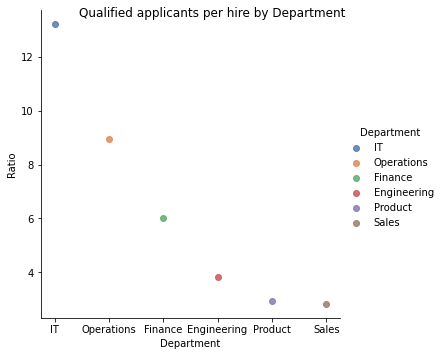

In [58]:
sns.lmplot( x="Department", y="Ratio", data=qual_cand_per_hire_dep, fit_reg=False, hue='Department', legend=True, palette="deep").fig.suptitle("Qualified applicants per hire by Department")

# Time to hire by depertment

Time to hire by Department

In [59]:
#Time to hire
df2['Recency'] = df2.Recency.astype(int)
g7 = df2.groupby('Department')['Recency'].mean()
Time_to_hire = g7.reset_index(drop=False)
Time_to_hire = Time_to_hire.sort_values(["Recency"], ascending = (True))


D:\Program\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
Time_to_hire.style.format({'Recency':'{:.1f}'}).highlight_max(axis=0)

,Department,Recency
0,Engineering,41.1
1,Finance,41.3
2,IT,42.0
4,Product,44.1
5,Sales,46.6
3,Operations,53.6


Engineering depertment takes **41 days** to recuit a candidate , followed by Finance and IT

# Offer acceptance rate

In [62]:
g9=df.loc[df['Event'].isin([0 , 1 , 2])]
g10 = g9.groupby(['Offer_taken'])['ID'].nunique()
g10 = g10.reset_index(drop=False)
g10['PCT'] = round((g10['ID']/g10['ID'].sum())*100)

g11 = g9.groupby(['Offer_taken','Type'])['ID'].nunique()
g11 = g11.reset_index(drop=False)
g11['PCT'] = round((g11['ID']/g11['ID'].sum())*100,2)
g11_tr = g11.transpose() #offer acceptance , rejection and pending by Candidate type


In [63]:
g11.style.highlight_max(axis=0).format({'PCT':'{:.1f}'})

,Offer_taken,Type,ID,PCT
0,Offer Accepted,Campus,49,39.5
1,Offer Accepted,Experienced,18,14.5
2,Offer Declined,Campus,32,25.8
3,Offer Declined,Experienced,13,10.5
4,Offer Response Pending,Campus,12,9.7


Campus students have the highest amount of acceptance rate

In [67]:
g12 = g9.groupby(['Offer_taken','Department'])['ID'].nunique()
g12 = g12.reset_index(drop=False)
g12['PCT'] = round((g12['ID']/g12['ID'].sum())*100,2)
    
    

In [65]:
(g12.style.highlight_max(axis=0).format({'PCT':'{:.1f}'}))

,Offer_taken,Department,ID,PCT
0,Offer Accepted,Engineering,24,19.4
1,Offer Accepted,Finance,3,2.4
2,Offer Accepted,IT,7,5.7
3,Offer Accepted,Operations,12,9.7
4,Offer Accepted,Product,8,6.5
5,Offer Accepted,Sales,13,10.5
6,Offer Declined,Engineering,20,16.1
7,Offer Declined,Finance,2,1.6
8,Offer Declined,IT,3,2.4
9,Offer Declined,Operations,3,2.4


Engineering department has the highest amount of acceptance rate


# Yield Ratio 

In [69]:
Yield = round((g9['ID'].count()/df['ID'].count()*100),2)
Yield

2.5

Yield** = # of applicants that were interviewed or have cleared the initial screening / total number of applications generated

Current Yield ratio is really low compared to industry standard

# Sourcing channel effecctiveness
 

Sourcing channel effectiveness

#Sourcing channel effectiveness , total 124 who have responded

In [70]:
s10 = g9.groupby(['Offer_taken','App_source'])['ID'].nunique()
s10 = s10.reset_index(drop=False)
s10['PCT'] = round((s10['ID']/s10['ID'].sum())*100,2)
s10_tr = s10.transpose()


In [71]:
s10.style.highlight_max(axis=0).format({'PCT':'{:.1f}'})

,Offer_taken,App_source,ID,PCT
0,Offer Accepted,Advertisement,7,5.7
1,Offer Accepted,Agency,10,8.1
2,Offer Accepted,Campus Event,15,12.1
3,Offer Accepted,Campus Job Board,9,7.3
4,Offer Accepted,Career Fair,14,11.3
5,Offer Accepted,Outsourced,4,3.2
6,Offer Accepted,Website,8,6.5
7,Offer Declined,Advertisement,1,0.8
8,Offer Declined,Agency,8,6.5
9,Offer Declined,Campus Event,13,10.5


Campus events have the highest amount of visibility , a key area to focus on. This table has 124 candidats with an outcome.


In [72]:
#source of hire #total 4959 from where candidates are coming
s11 = df.groupby(['App_source','Stage'])['ID'].nunique()
s11 = s11.reset_index(drop=False)
s11['PCT'] = round((s11['ID']/s11['ID'].sum())*100,2) 


In [74]:
s11.style.highlight_max(axis=0).format({'PCT':'{:.1f}'})

,App_source,Stage,ID,PCT
0,Advertisement,In-House Interview,59,1.2
1,Advertisement,New Application,362,7.3
2,Advertisement,Offer Sent,9,0.2
3,Advertisement,Phone Screen,72,1.4
4,Agency,In-House Interview,48,1.0
5,Agency,New Application,151,3.0
6,Agency,Offer Sent,18,0.4
7,Agency,Phone Screen,51,1.0
8,Campus Event,In-House Interview,138,2.8
9,Campus Event,New Application,333,6.7


Campus job boards** and **Campus job events** have the most amount of visibility. **25** of the total new applications come from job boards.We can see Agencies are not contributing as much as organic sources.


 # Hiring Diversity


Hiring Diversity

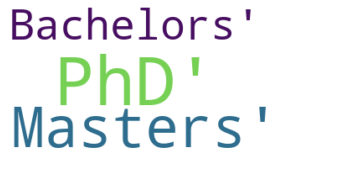

In [80]:
Image(filename='C://Users//subhr//Desktop/Diversity.png') 
                     

Candidates have a good mixture of different backgrounds , i.e : Bachelors , Masters and Phd

# Experience by Team

Average experience by department

In [81]:
e11 = df.groupby(['Department'])['Experience'].mean()
e11 = e11.reset_index(drop=False)
e11 = e11.sort_values(["Experience"], ascending = (False))

In [85]:
e11.style.highlight_max(axis=0).format({'Experience':'{:.1f}'})

,Department,Experience
3,Operations,7.9
2,IT,7.3
1,Finance,4.5
4,Product,1.4
5,Sales,0.8
0,Engineering,0.7


Operations team have the most number of experienced candidates **8%** followed by IT team **7.4%**

# Best day to send or not send an offer letter

When to send / hold Offer Letter

In [86]:
a11 = df2.groupby('Day')['ID'].nunique()
a11 = a11.reset_index(drop=False)
a11 = a11.sort_values(["ID"], ascending = (False))
a11['PCT'] = round((a11['ID']/a11['ID'].sum())*100,2)

In [88]:
a11.style.highlight_max(axis=0).format({'PCT':'{:.1f}'})

,Day,ID,PCT
1,Monday,13,19.4
3,Sunday,12,17.9
2,Saturday,10,14.9
0,Friday,9,13.4
4,Thursday,9,13.4
6,Wednesday,8,11.9
5,Tuesday,6,9.0


In [89]:
#best day to not send an offer letter
df3=df.loc[df['Event'] == 0]
n11 = df3.groupby('Day')['ID'].nunique()
n11 = n11.reset_index(drop=False)
n11 = n11.sort_values(["ID"], ascending = (False))
n11['PCT'] = round((n11['ID']/n11['ID'].sum())*100,2)


In [90]:
n11.style.highlight_max(axis=0).format({'PCT':'{:.1f}'})

,Day,ID,PCT
0,Friday,10,22.2
1,Monday,7,15.6
5,Tuesday,7,15.6
2,Saturday,6,13.3
6,Wednesday,6,13.3
4,Thursday,5,11.1
3,Sunday,4,8.9


On Mondays **19%** offer got accepted and on Fridays **22%** offers got rejected